In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
tf.random.set_seed(13)

## Preparation and Data Reading

In [16]:
def performance_representation_plot(data_predictions_array, data_truth_array, title,
                                    title_in_plot=True, save_file=False, print_plot=True, upper_border=True, legend_font_size="medium",
                                    axis_value_size="medium", axis_label_size="medium"):
    
    fig = plt.figure(figsize=(30,10))
    plt.xlabel("Horas", fontdict={"fontsize":axis_label_size})
    plt.tick_params(axis="both", labelsize=axis_value_size)
    plt.title(title) if title_in_plot else print(title)
    plt.ylabel("Viagens requisitadas por hora", fontdict={"fontsize":axis_label_size})
    plt.plot(data_truth_array, marker="o", label="Valores Reais")
    plt.plot(data_predictions_array, marker="D", label="Valores Previstos")
    if(not upper_border):
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.legend(fontsize=legend_font_size)
    plt.savefig("plots\\" + title.replace(" ", "_")+ ".png", bbox_inches='tight') if save_file else print()
    plt.show() if print_plot else print()

In [17]:
evo_data = np.loadtxt(r"results/LSTM_Evo Multivariable_Predictions_by12Hrs.txt", delimiter=",")
evo_results = pd.read_csv(r"results/LSTM_Evo Multivariable_Results.txt")

evo_data_single_var = np.loadtxt(r"results/LSTM_Evo_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
evo_results_single_var = pd.read_csv(r"results/LSTM_Evo_Single_Variable_Results.txt")

modo_data = np.loadtxt(r"results/LSTM_Modo Multivariable_Predictions_by12Hrs.txt", delimiter=",")
modo_results = pd.read_csv(r"results/LSTM_Modo Multivariable_Results.txt")

modo_data_single_var = np.loadtxt(r"results/LSTM_Modo_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
modo_results_single_var = pd.read_csv(r"results/LSTM_Modo_Single_Variable_Results.txt")

c2g_data = np.loadtxt(r"results/LSTM_Car2Go Multivariable_Predictions_by12Hrs.txt", delimiter=",")
c2g_results = pd.read_csv(r"results/LSTM_Car2Go Multivariable_Results.txt")

c2g_data_single_var = np.loadtxt(r"results/LSTM_Car2Go_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
c2g_results_single_var = pd.read_csv(r"results/LSTM_Car2Go_Single_Variable_Results.txt")

## Plot Generation

In [22]:
plot_styling = {
    "title_in_plot":False,
    "save_file":True,
    "print_plot":True,
    "upper_border":False,
    "legend_font_size":36,
    "axis_value_size":32,
    "axis_label_size":34
}

Evo Multivariable


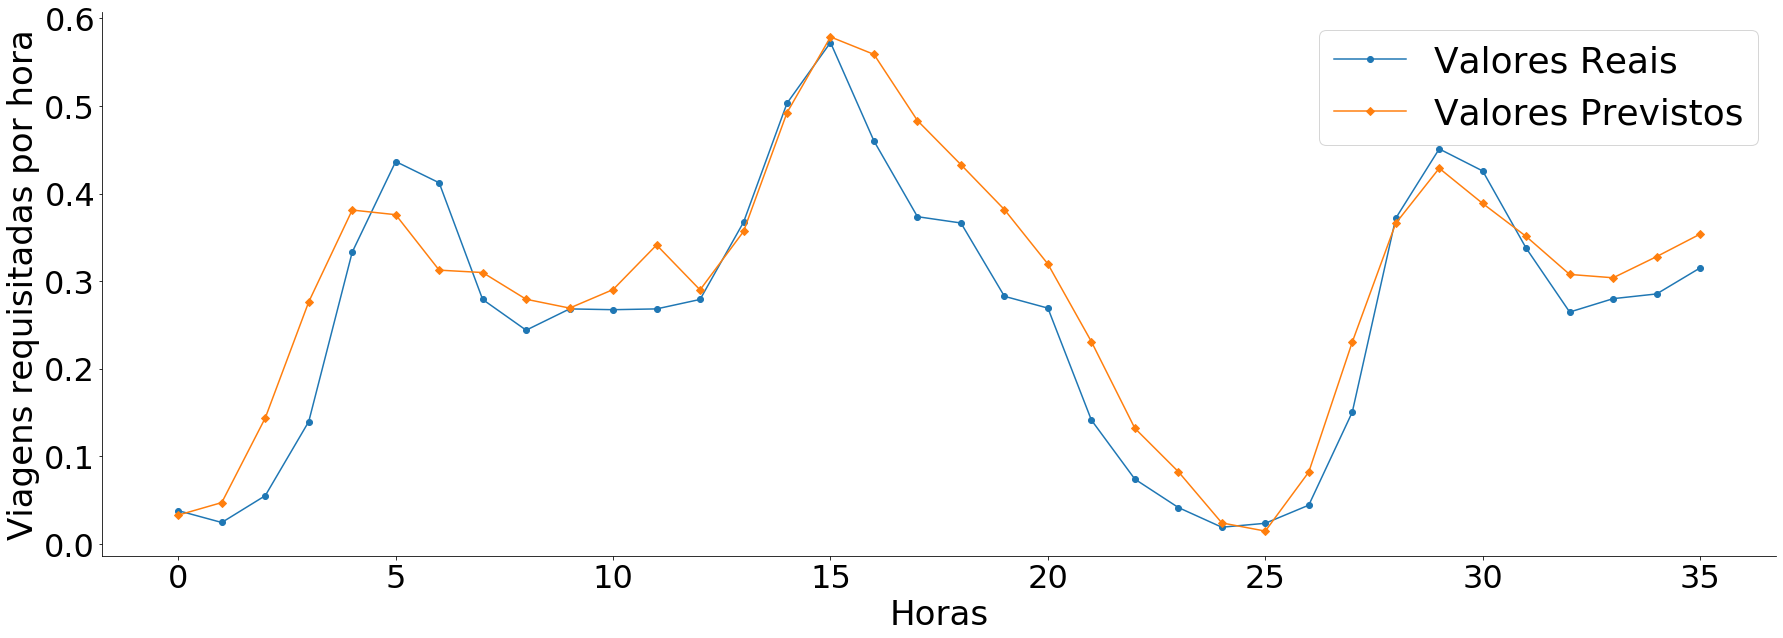

Evo Univariable


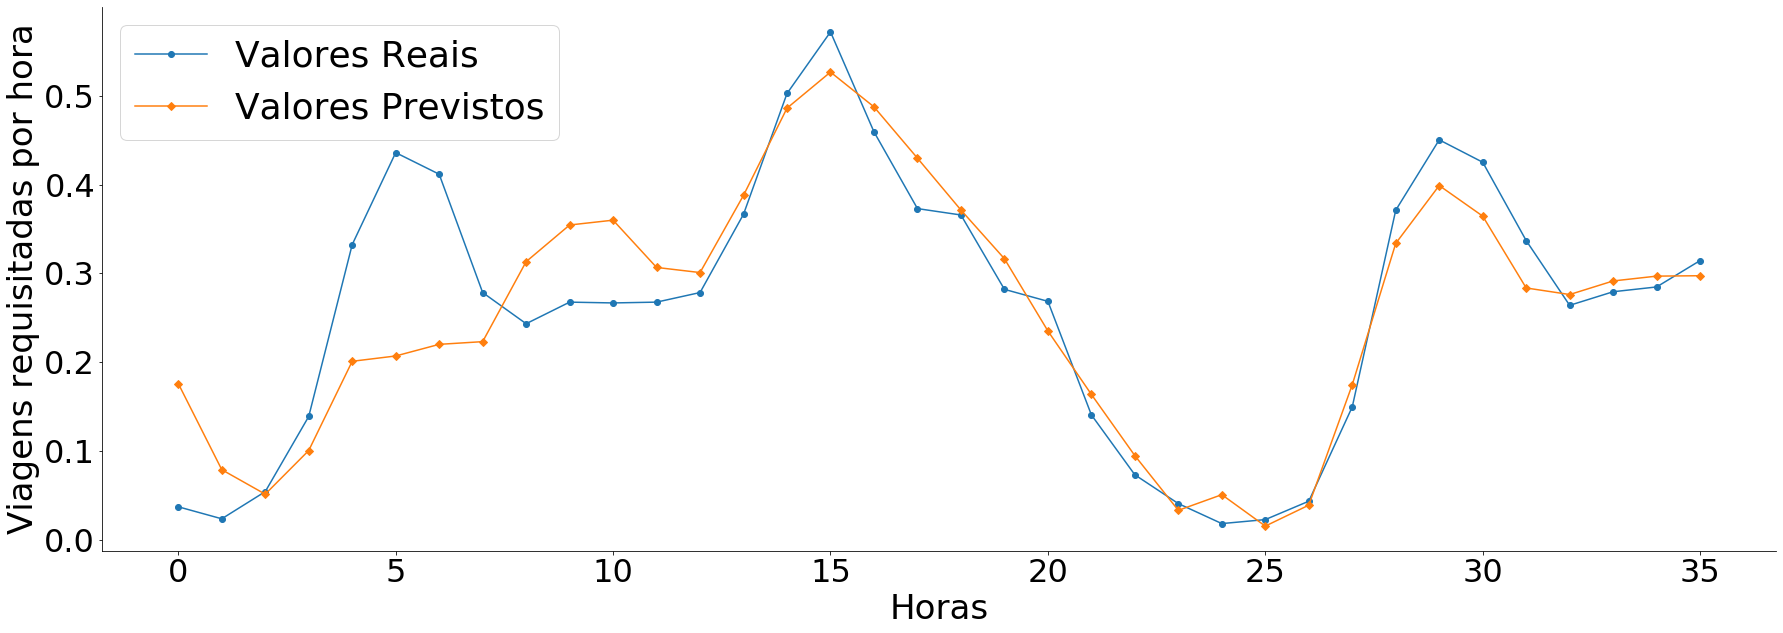

Modo Multivariable


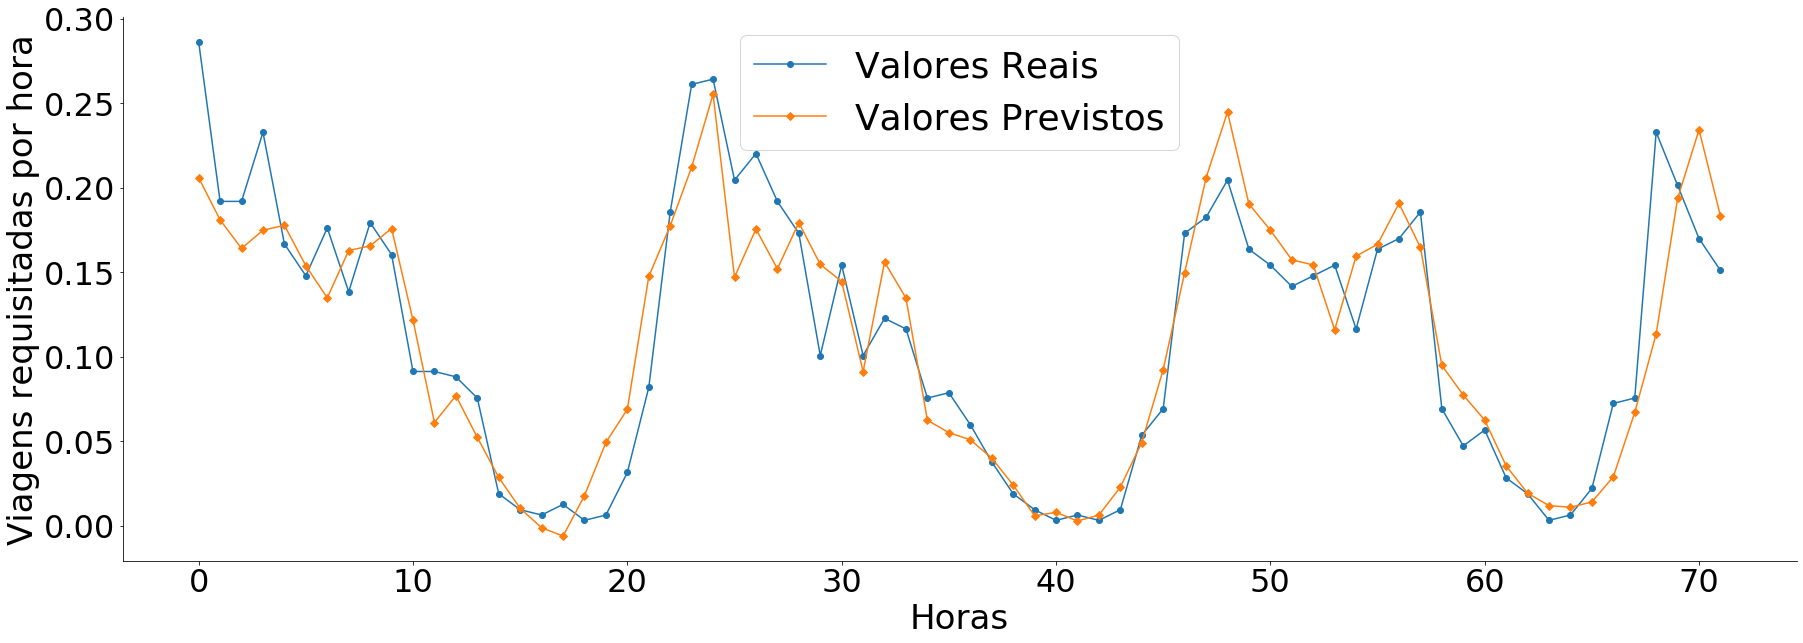

Modo Univariable


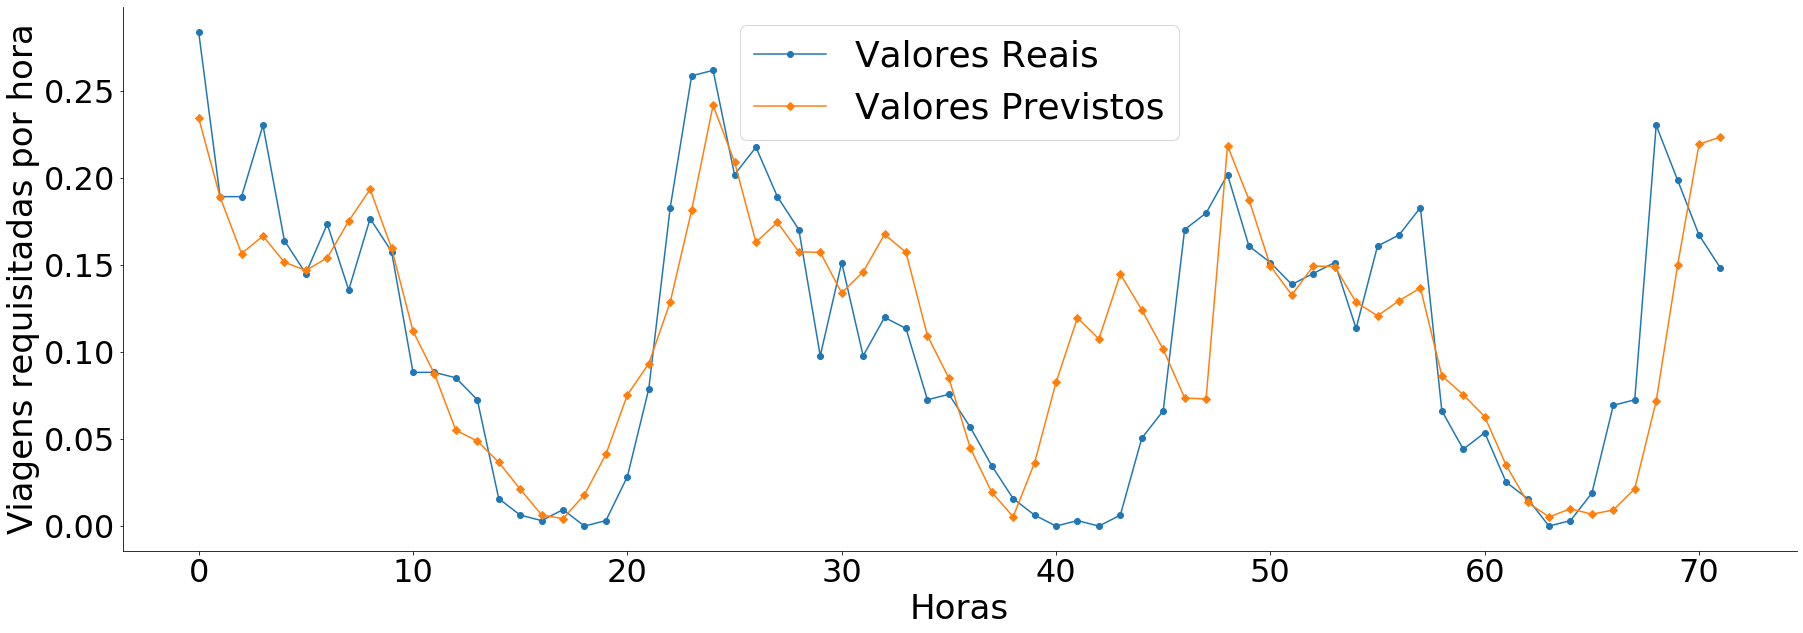

Car2Go Multivariable


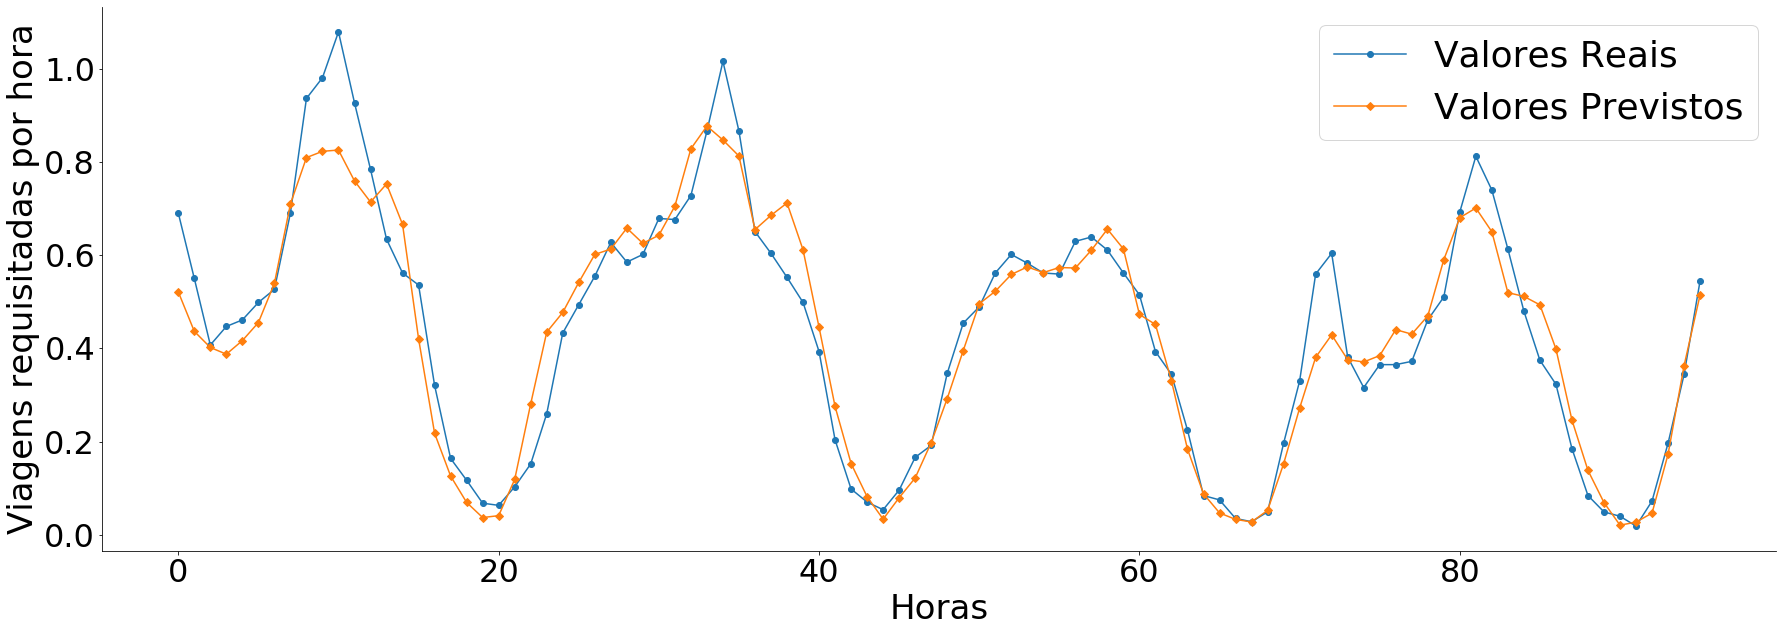

Car2Go Univariable


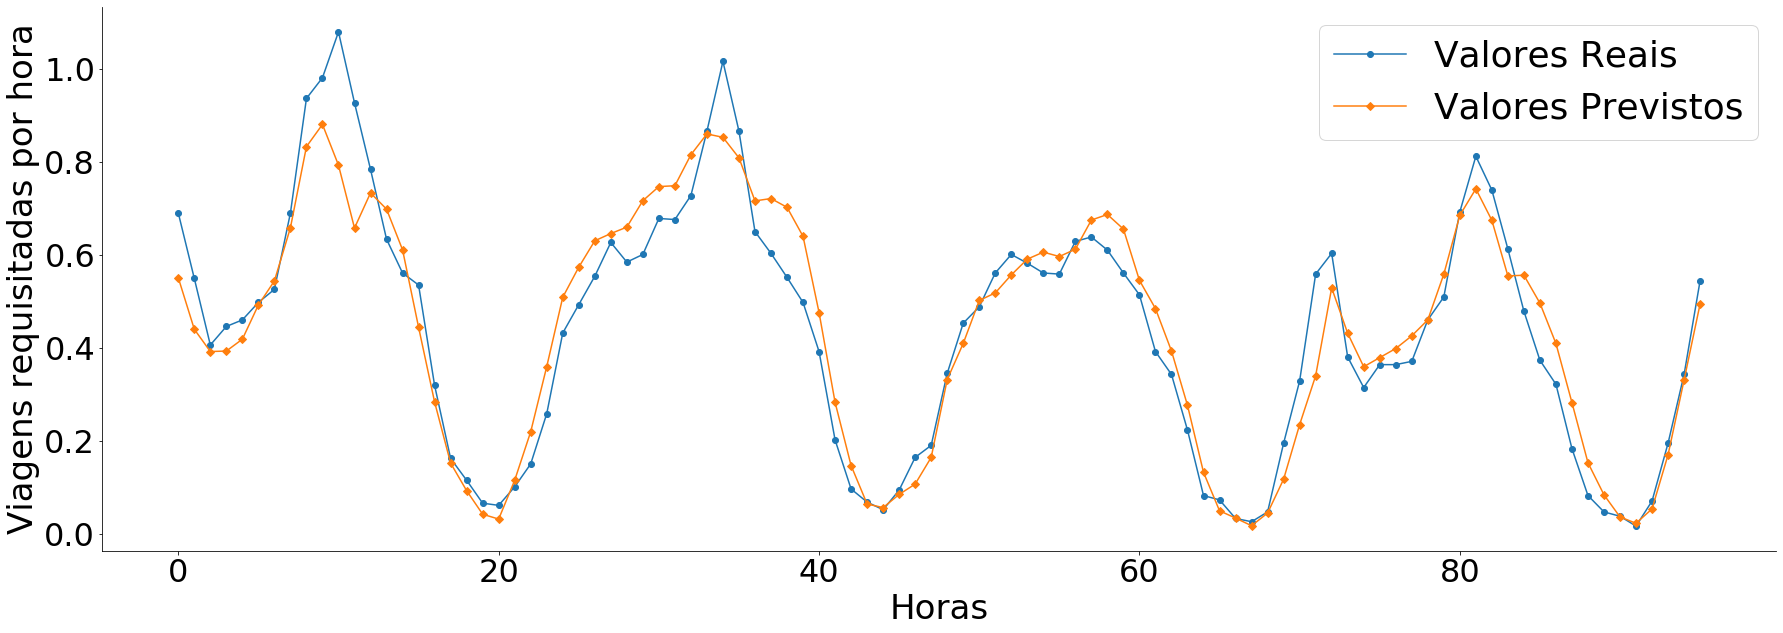

In [23]:
performance_representation_plot(evo_data[0], evo_data[1], "Evo Multivariable", **plot_styling)
performance_representation_plot(evo_data_single_var[0], evo_data_single_var[1], "Evo Univariable", **plot_styling)
performance_representation_plot(modo_data[0], modo_data[1], "Modo Multivariable", **plot_styling)
performance_representation_plot(modo_data_single_var[0], modo_data_single_var[1], "Modo Univariable", **plot_styling)
performance_representation_plot(c2g_data[0], c2g_data[1], "Car2Go Multivariable", **plot_styling)
performance_representation_plot(c2g_data_single_var[0], c2g_data_single_var[1], "Car2Go Univariable", **plot_styling)